# Data Wrangling in Python
written by: Ejaz ur Rehman\
date: 2025-02-09\
email: ijazfinance@gmail.com

Data Wrangling (also known as Data Munging) is the process of cleaning, transforming, and organizing raw data into a structured and usable format for analysis. It involves handling missing values, removing duplicates, correcting inconsistencies, and converting data into a format suitable for data analytics or machine learning.

**Key Steps in Data Wrangling**
1. Data Collection – Gathering raw data from various sources (databases, APIs, spreadsheets, etc.).
2. Data Cleaning – Removing errors, handling missing values, and correcting inconsistencies.
3. Data Transformation – Converting data types, normalizing, aggregating, and restructuring data.
4. Data Enrichment – Combining multiple datasets to enhance data quality.
5. Data Validation – Ensuring the data is accurate, complete, and formatted correctly.
6. Data Exporting – Storing the wrangled data in a database or format suitable for analysis.

**Why is Data Wrangling Important?**
* Improves Data Quality – Ensures accuracy and consistency in data.
* Enhances Decision-Making – Clean, structured data leads to better insights.
* Saves Time – Automates data preparation for analysts and data scientists.
* Optimizes Machine Learning Models – Well-prepared data improves model performance.

**Common Data Wrangling Tools**
* Python (Pandas, NumPy)
* R (dplyr, tidyr)
* SQL
* Excel & Power Query
* ETL Tools (Talend, Alteryx)

## 1. Import Liabraries

In [1]:
# importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [2]:
# laod the data
df = sns.load_dataset ('titanic')

## 3. Data Checking

In [3]:
df.head ()
    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 4. Finding the Missing Values

In [ ]:
# find the missing values in the data in terms of percentage
df.isnull ().sum() / len (df) *100  

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64


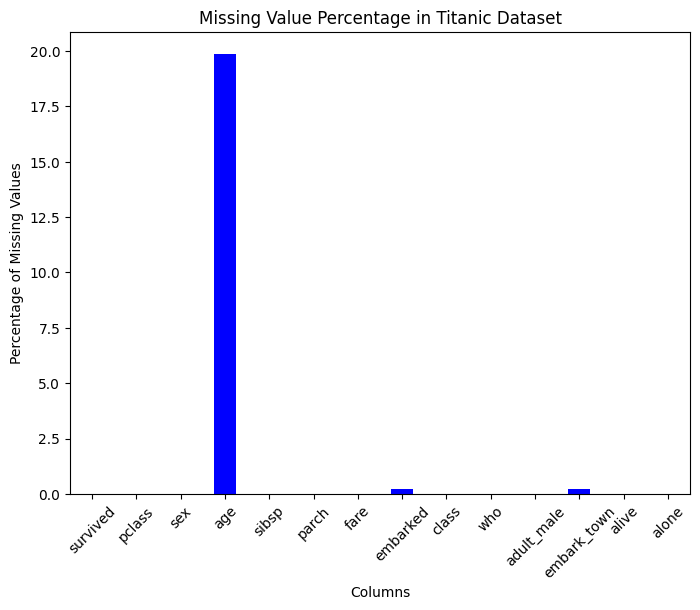

In [13]:
# Calculate missing value percentage
missing_percentage = round((df.isnull().sum() / len(df)) * 100, 2)
# Display missing value percentages
print(missing_percentage)
# Visualize missing value percentages
missing_percentage.plot(kind='bar', figsize=(8, 6), color='blue')
plt.title('Missing Value Percentage in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.show()

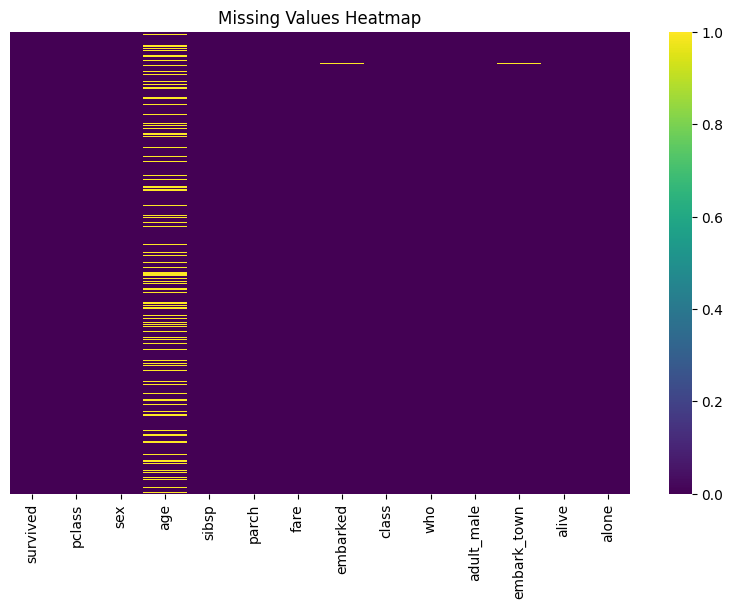

In [14]:
# Create a heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## 5. Handling of Missing Values

##### 5.1 Age Column (Numeric Data)

In [25]:
# Fill missing values in 'Age' with the median
df['age'].fillna(df['age'].median(), inplace=True)
# Verify
print(df['age'].isnull().sum())  # Should output 0


0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15152\3592394097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


##### 5.2 Embarked Column (Categorical Data)

In [16]:
# Fill missing values in 'Embarked' with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Verify
print(df['embarked'].isnull().sum())  # Should output 0

0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15152\3074649823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


##### 5.3 Embarked Town Column (Categorical Data)

In [17]:
# Fill missing values in 'Embarked' with the mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Verify
print(df['embark_town'].isnull().sum())  # Should output 0

0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15152\2918571484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


##### 5.4 Deck Column (Categorical Data)

In [ ]:
# Drop the 'deck' column
df.drop('deck', axis=1, inplace=True)

# Verify
print('deck' in df.columns)  # Should output False

In [23]:
# Check for missing values again
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


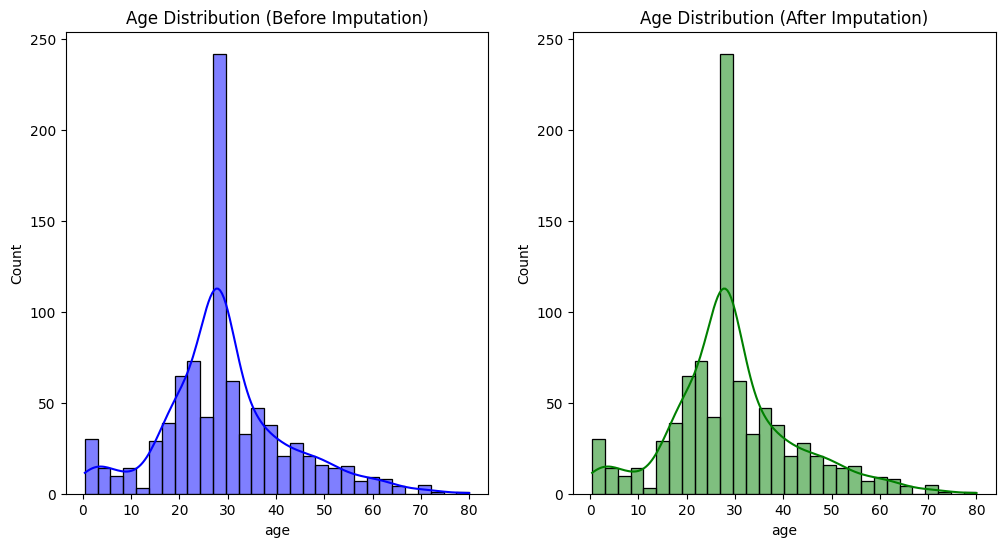

In [27]:
# Plot the distribution of 'Age' before and after filling missing values
plt.figure(figsize=(12, 6))

# Before handling missing values
plt.subplot(1, 2, 1)
sns.histplot(df['age'].dropna(), kde=True, color='blue')
plt.title('Age Distribution (Before Imputation)')

# After handling missing values
plt.subplot(1, 2, 2)
sns.histplot(df['age'], kde=True, color='green')
plt.title('Age Distribution (After Imputation)')

plt.show()

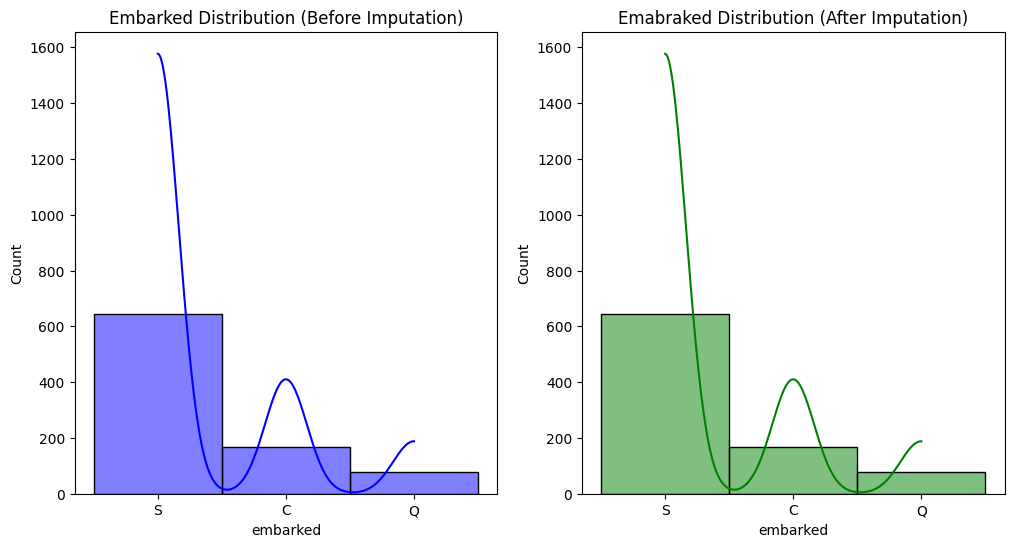

In [30]:
# Plot the distribution of 'Emabarked' before and after filling missing values
plt.figure(figsize=(12, 6))

# Before handling missing values
plt.subplot(1, 2, 1)
sns.histplot(df['embarked'].dropna(), kde=True, color='blue')
plt.title('Embarked Distribution (Before Imputation)')

# After handling missing values
plt.subplot(1, 2, 2)
sns.histplot(df['embarked'], kde=True, color='green')
plt.title('Emabraked Distribution (After Imputation)')

plt.show()

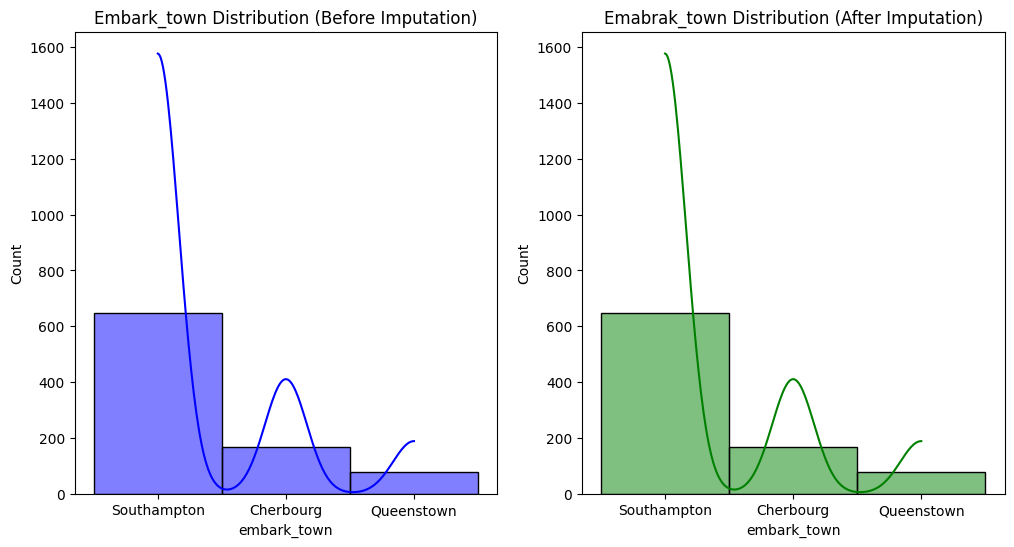

In [34]:
# Plot the distribution of 'Emabarked' before and after filling missing values
plt.figure(figsize=(12, 6))

# Before handling missing values
plt.subplot(1, 2, 1)
sns.histplot(df['embark_town'].dropna(), kde=True, color='blue')
plt.title('Embark_town Distribution (Before Imputation)')

# After handling missing values
plt.subplot(1, 2, 2)
sns.histplot(df['embark_town'], kde=True, color='green')
plt.title('Emabrak_town Distribution (After Imputation)')

plt.show()

In [11]:
# Check for Duplicate values
# Find duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female   NaN      0      0   7.7500        Q   Third   
76          0       3    male   NaN      0      0   7.8958        S   Third   
77          0       3    male   NaN      0      0   8.0500        S   Third   
87          0       3    male   NaN      0      0   8.0500        S   Third   
95          0       3    male   NaN      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male  embark_town alive  alone  


In [12]:
# count the duplicate
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 111
